# Multi Linear Regression (Toyota Corolla)

Shubham's Assignment

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
Toyota = pd.read_csv("ToyotaCorolla.csv",encoding='ISO-8859-1')
Toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
Toyota1= Toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
Toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
Toyota1.rename(columns={"Age_08_04":"Age"},inplace=True)

In [6]:
eda=Toyota1.describe()
eda

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
#data visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x16c4875d970>,
 'caps': [<matplotlib.lines.Line2D at 0x16c489ef550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c4910d490>],
 'medians': [<matplotlib.lines.Line2D at 0x16c489efaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c489efdc0>],
 'means': []}

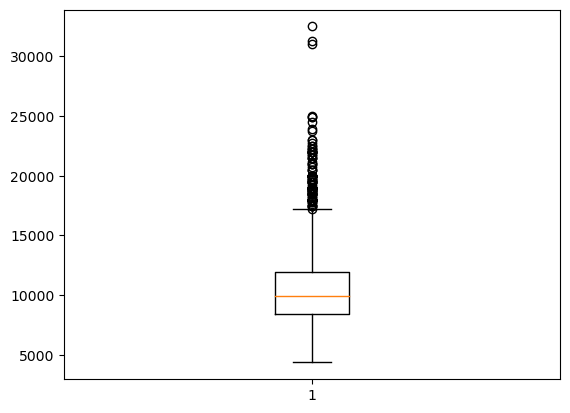

In [8]:
plt.boxplot(Toyota1["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16c48ca2ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c48cc4280>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c48ca29d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c48cc4850>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c48cc4b20>],
 'means': []}

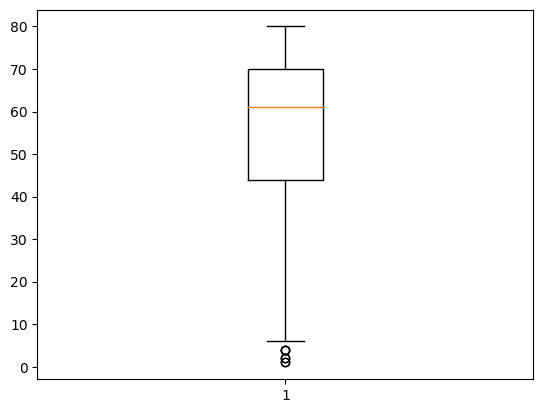

In [9]:
plt.boxplot(Toyota1["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16c48d61ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c48d804c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c48d61c10>],
 'medians': [<matplotlib.lines.Line2D at 0x16c48d80a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c48d80d30>],
 'means': []}

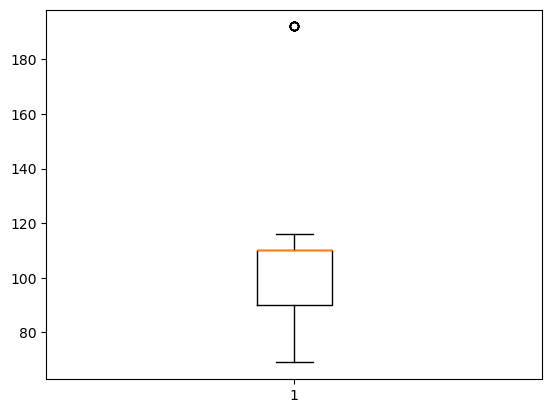

In [10]:
plt.boxplot(Toyota1["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16c48ead7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c48eadd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c48ead4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c48ecd340>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c48ecd610>],
 'means': []}

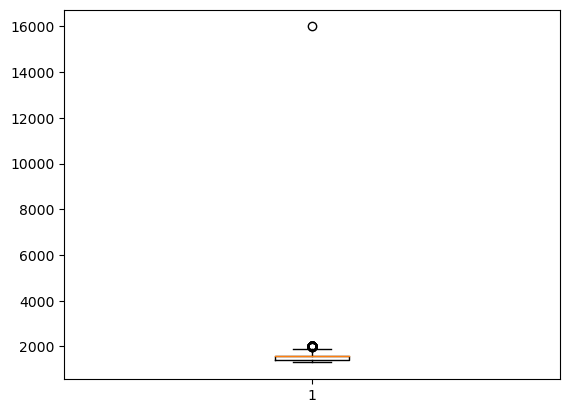

In [11]:
plt.boxplot(Toyota1["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16c49206130>,
 'caps': [<matplotlib.lines.Line2D at 0x16c492066d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c491f6e20>],
 'medians': [<matplotlib.lines.Line2D at 0x16c49206c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c49206f40>],
 'means': []}

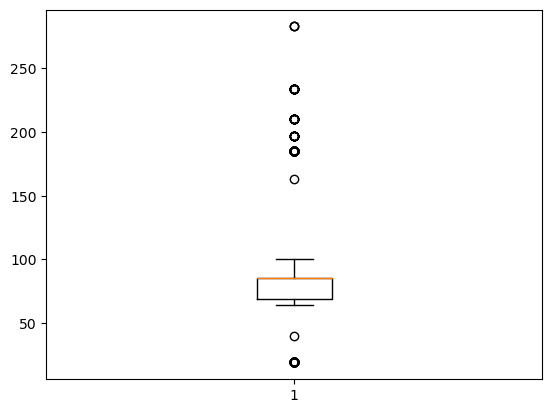

In [13]:
plt.boxplot(Toyota1["Quarterly_Tax"])

{'whiskers': [<matplotlib.lines.Line2D at 0x16c4880dcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c488f02b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c4880da60>],
 'medians': [<matplotlib.lines.Line2D at 0x16c488f0850>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c488f0b20>],
 'means': []}

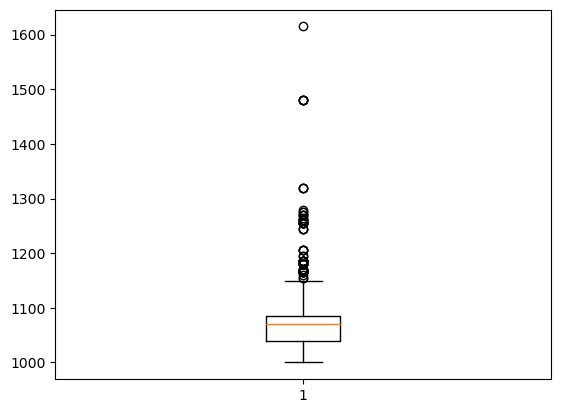

In [14]:
plt.boxplot(Toyota1["Weight"])

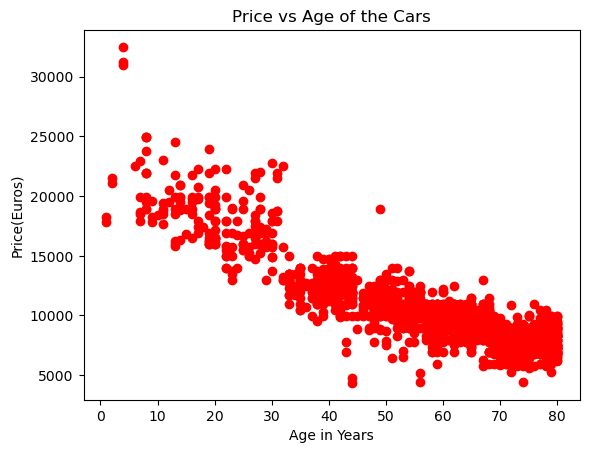

In [15]:
plt.scatter(Toyota1['Age'], Toyota1['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

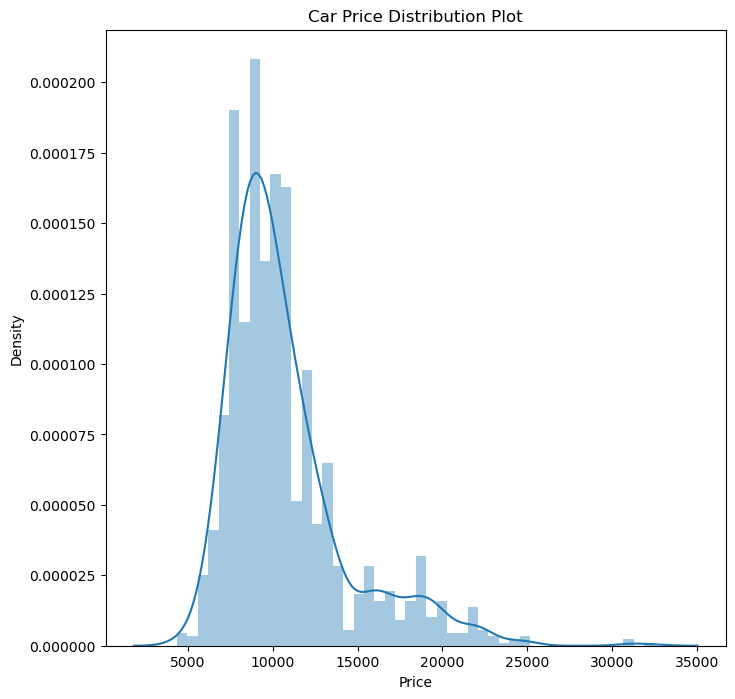

In [16]:
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(Toyota1['Price'])

In [17]:
import statsmodels.api as sm

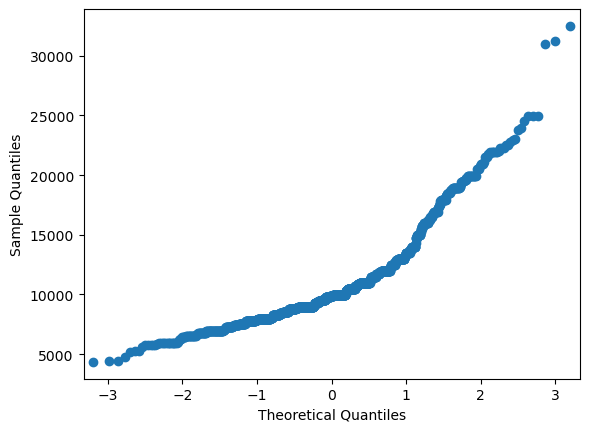

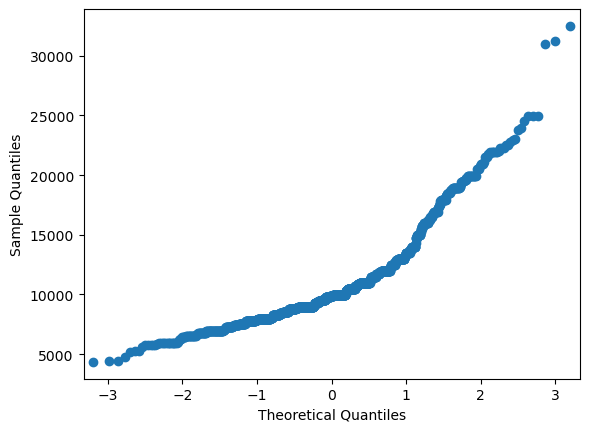

In [18]:
sm.graphics.qqplot(Toyota1["Price"])

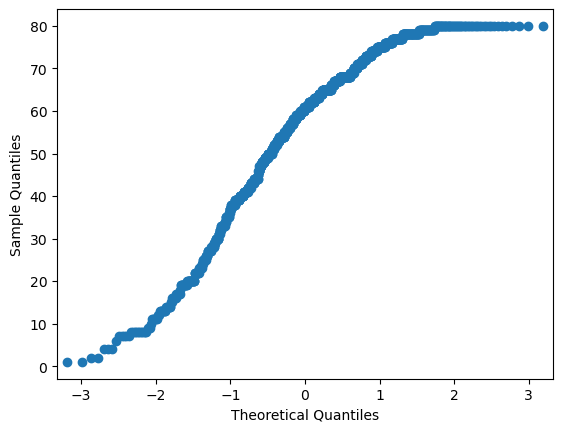

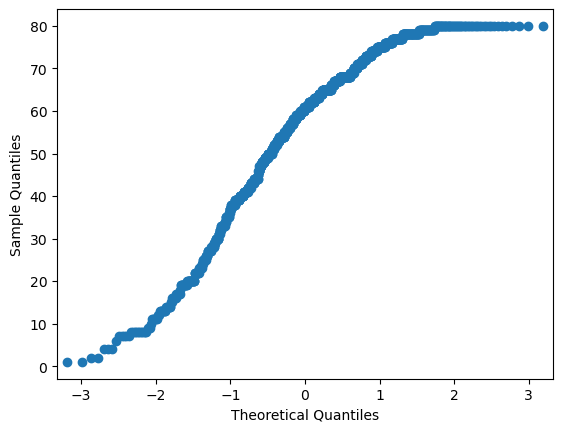

In [19]:
sm.graphics.qqplot(Toyota1["Age"])

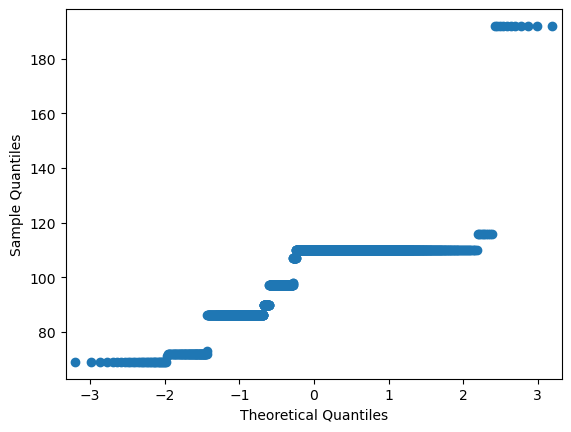

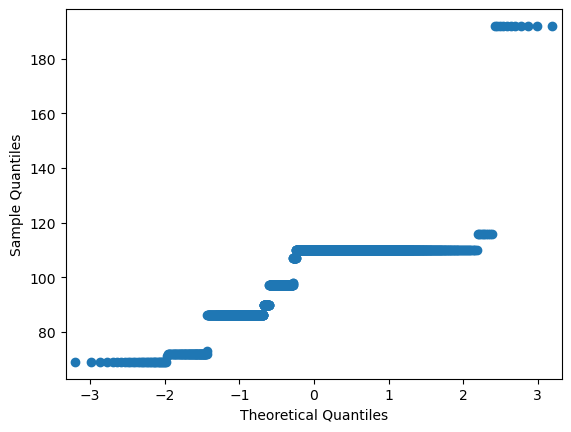

In [20]:
sm.graphics.qqplot(Toyota1["HP"])

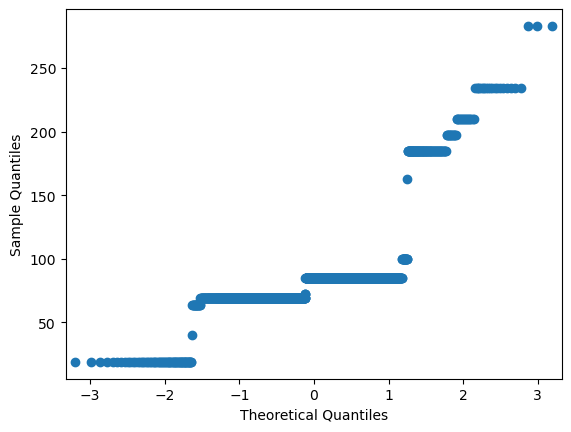

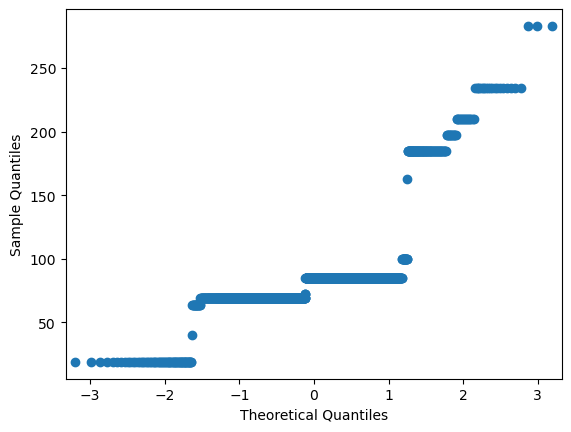

In [21]:
sm.graphics.qqplot(Toyota1["Quarterly_Tax"])

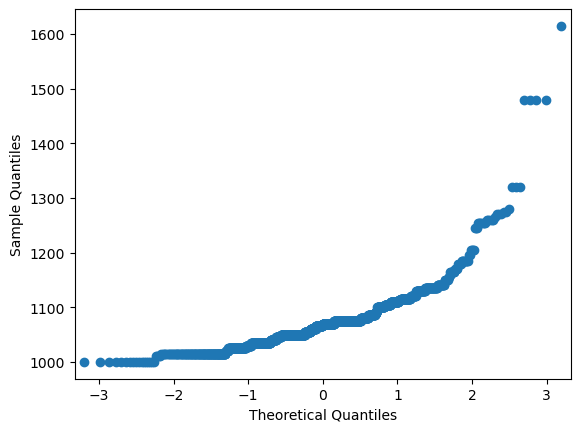

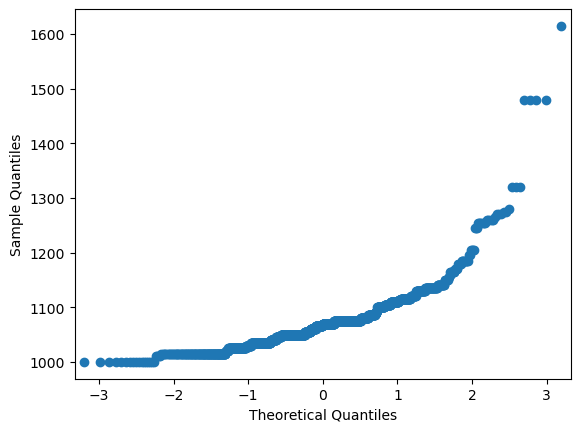

In [22]:
sm.graphics.qqplot(Toyota1["Weight"])

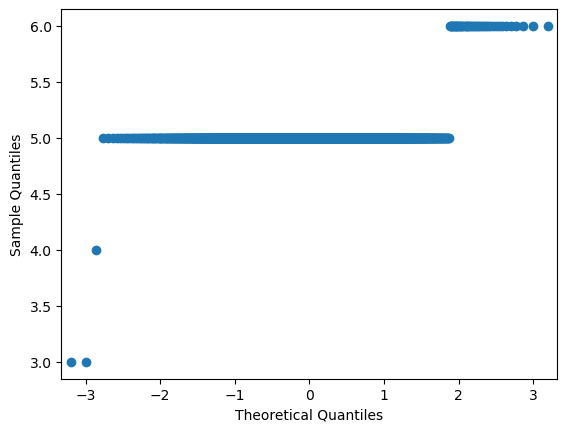

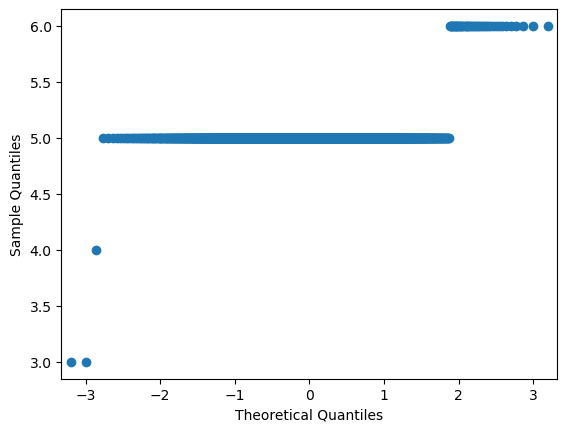

In [23]:
sm.graphics.qqplot(Toyota1["Gears"])

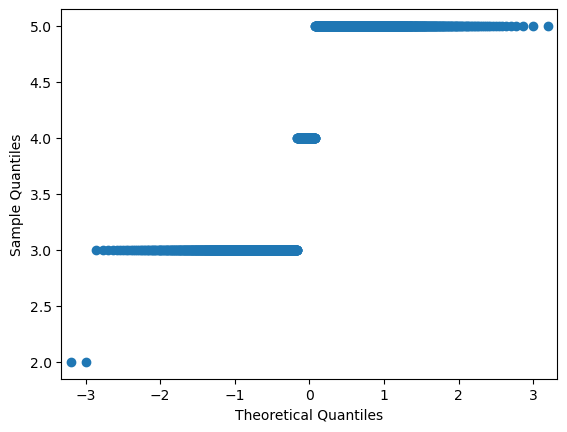

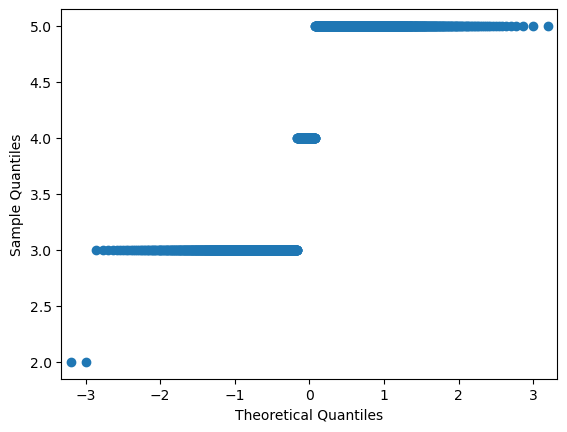

In [24]:
sm.graphics.qqplot(Toyota1["Doors"])

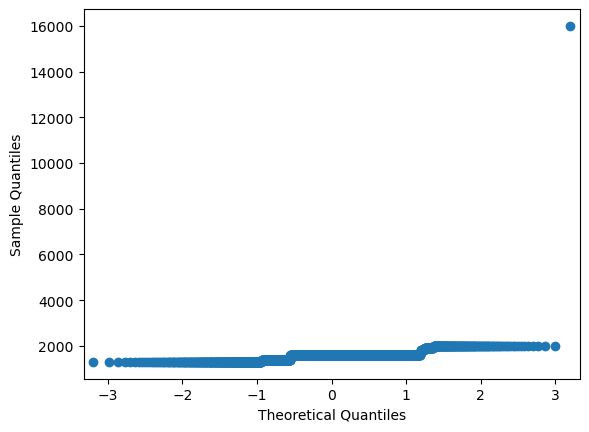

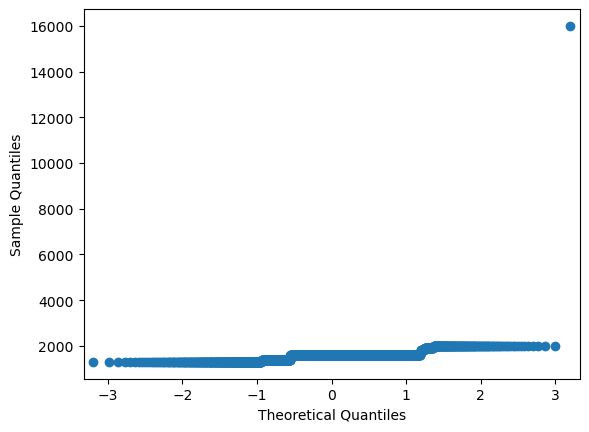

In [25]:
sm.graphics.qqplot(Toyota1["cc"])

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

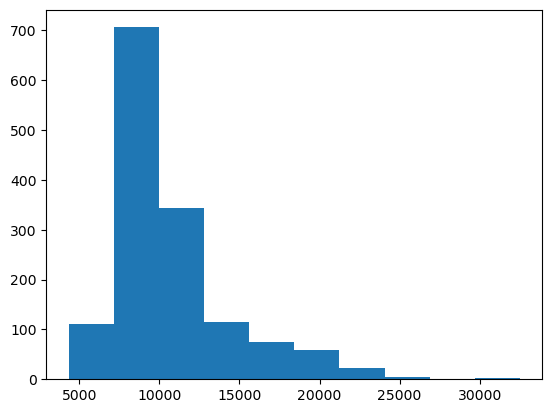

In [26]:
plt.hist(Toyota1["Price"])

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

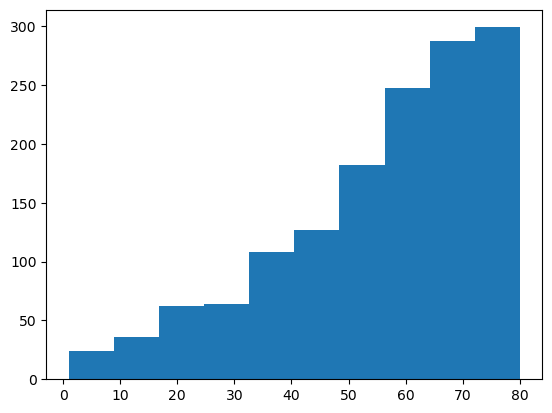

In [27]:
plt.hist(Toyota1["Age"])

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

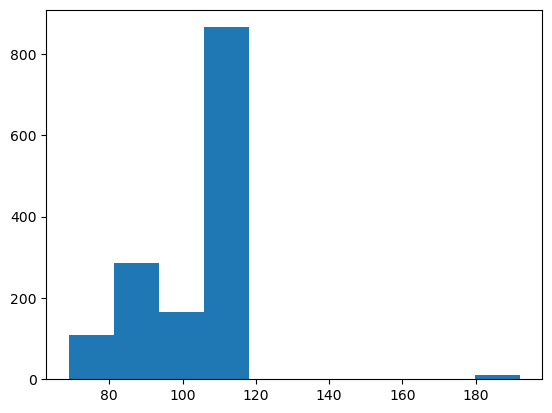

In [28]:
plt.hist(Toyota1["HP"])

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <BarContainer object of 10 artists>)

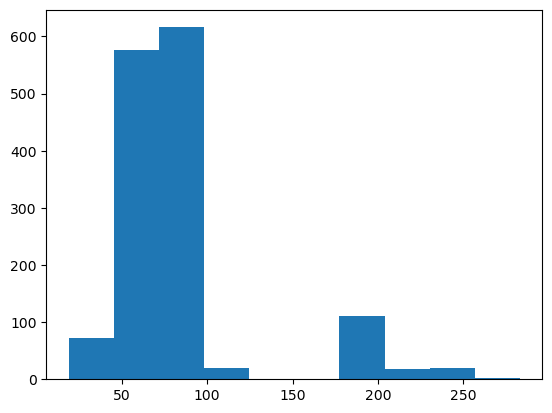

In [29]:
plt.hist(Toyota1["Quarterly_Tax"])

(array([664., 620., 107.,  18.,  19.,   3.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <BarContainer object of 10 artists>)

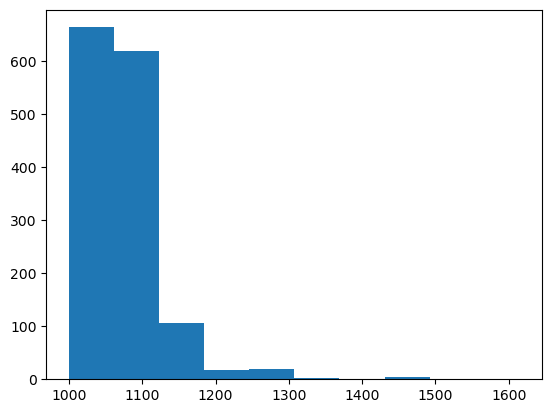

In [30]:
plt.hist(Toyota1["Weight"])

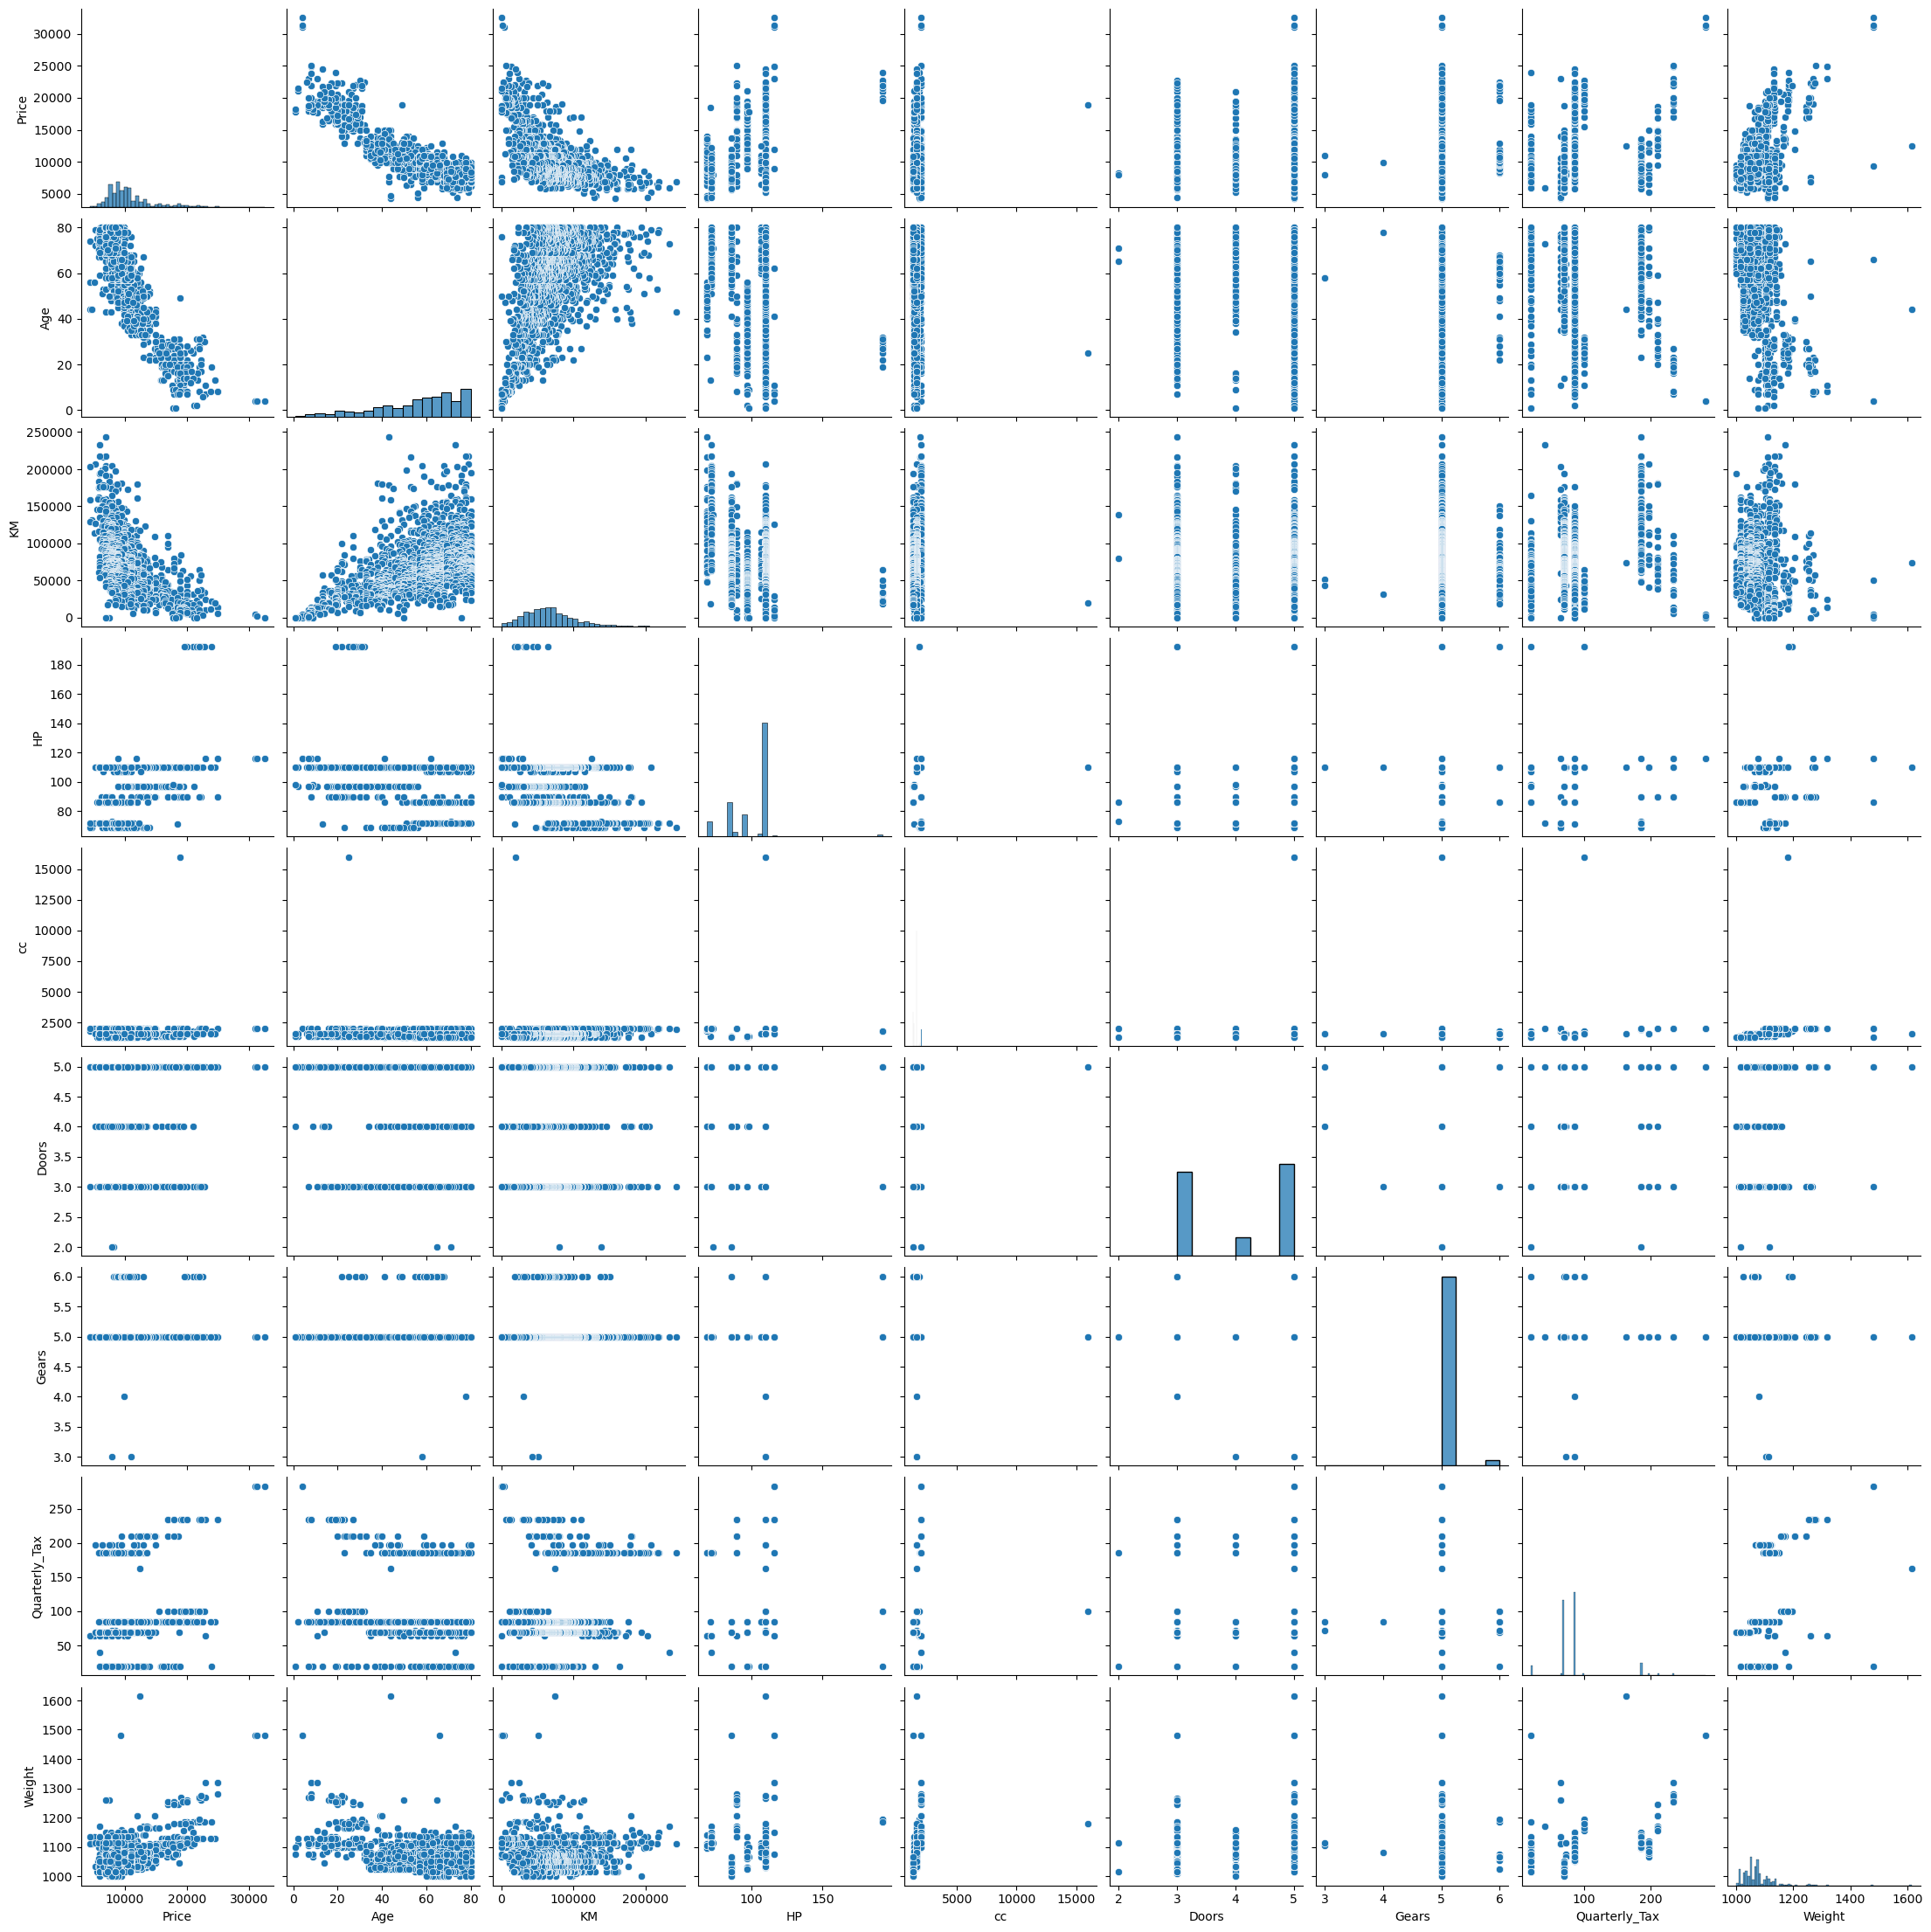

In [31]:
sns.pairplot(Toyota1)

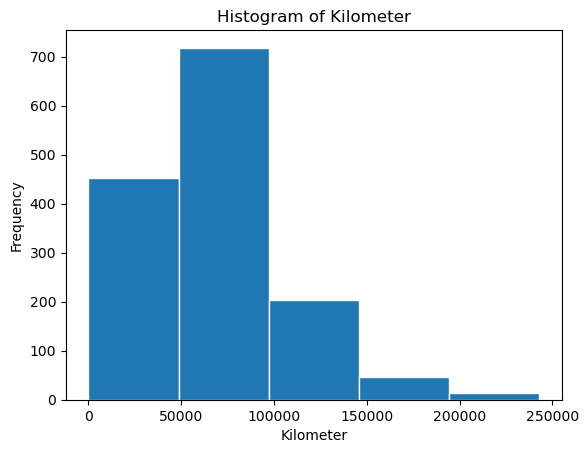

In [32]:
plt.hist(Toyota1['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

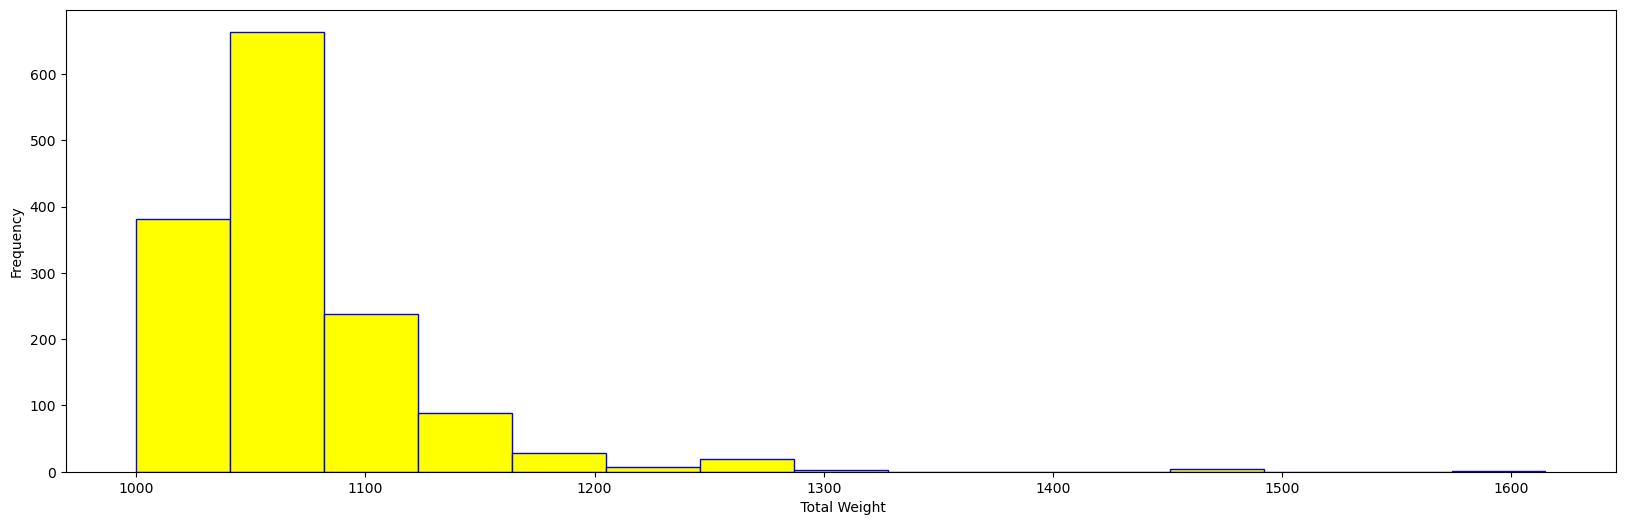

In [33]:
plt.figure(figsize=(20, 6))
plt.hist(Toyota1['Weight'],facecolor ="yellow",edgecolor ="blue",bins =15)
plt.ylabel("Frequency");
plt.xlabel(" Total Weight")
plt.show()

<AxesSubplot:title={'center':'Bar plot of cc'}, xlabel='Frequency', ylabel='cc'>

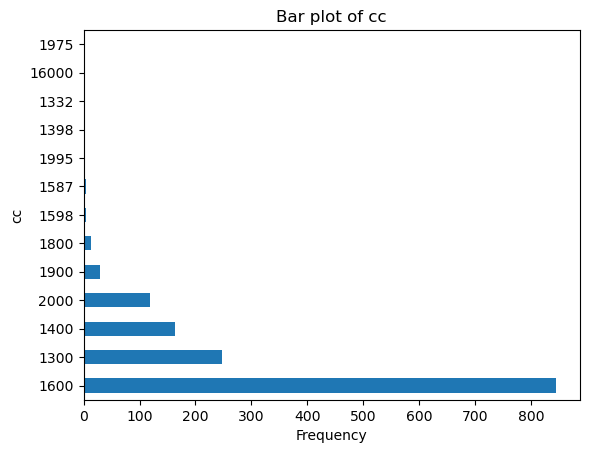

In [34]:
fuel_count = pd.value_counts(Toyota1['cc'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('cc')
plt.title('Bar plot of cc')
fuel_count.plot.barh()


<AxesSubplot:xlabel='Age', ylabel='Price'>

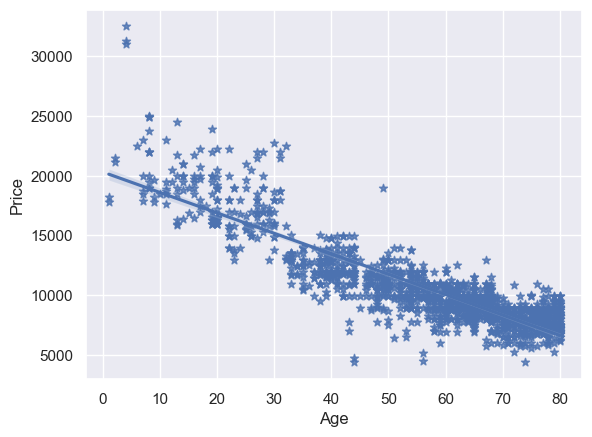

In [35]:
sns.set(style = 'darkgrid')
sns.regplot(x = Toyota1['Age'], y = Toyota1['Price'], marker = '*')

In [36]:
#Build individual model

In [37]:
correlation_values= Toyota1.corr()
correlation_values

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [38]:
import statsmodels.formula.api as smf

In [39]:
m1= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= Toyota1).fit()

In [40]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:49:06   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
m1_cc = smf.ols("Price~cc",data= Toyota1).fit()

In [42]:
m1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.55e-06
Time:                        20:49:20   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
m1_doors = smf.ols("Price~Doors", data= Toyota1).fit()

In [44]:
m1_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.46e-12
Time:                        20:49:29   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
m1_to = smf.ols("Price~cc+Doors",data= Toyota1).fit()

In [46]:
m1_to.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.15e-15
Time:                        20:49:42   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
import statsmodels.api as sm

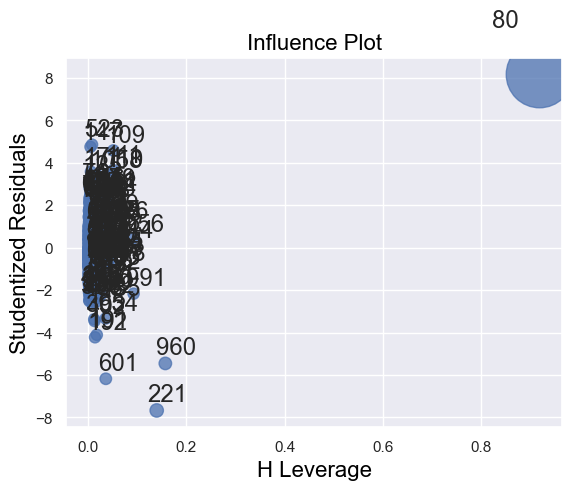

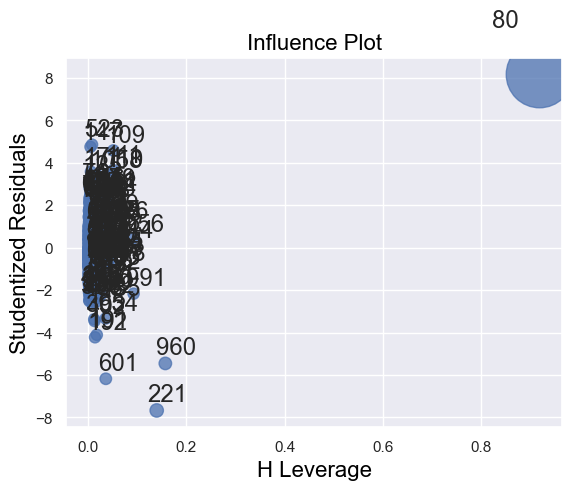

In [48]:
sm.graphics.influence_plot(m1)

In [49]:
Toyota2= Toyota1.drop(Toyota.index[[80]],axis=0)

In [50]:
m2= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= Toyota2).fit()

In [51]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:24   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age            -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
Toyota3 = Toyota1.drop(Toyota.index[[80,221]],axis=0)

In [53]:
m3= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= Toyota3).fit()

In [54]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:50:42   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age            -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM               -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP               39.2932      2.816     13.953      0.000      33.769      44.817
cc               -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors           -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears           485.0462    186.602      2.599      0.009     119.001     851.091
Quarterly_Tax     7.9664      1.382      5.762      0.000       5.254      10.678
Weight           25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
Toyota4= Toyota1.drop(Toyota.index[[80,221,960]],axis=0)

In [56]:
m4= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = Toyota4).fit()

In [57]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:51:04   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#final model

In [59]:
Finalmodel = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = Toyota4).fit()

In [60]:
Finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:51:18   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age            -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#predictions

In [62]:
Finalmodel_pred = Finalmodel.predict(Toyota4)
Finalmodel_pred

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1431     9115.435074
1432     8499.218117
1433     8644.947302
1434     8758.664462
1435    10641.521002
Length: 1433, dtype: float64

In [63]:
#validation

Text(0, 0.5, 'Predicted values')

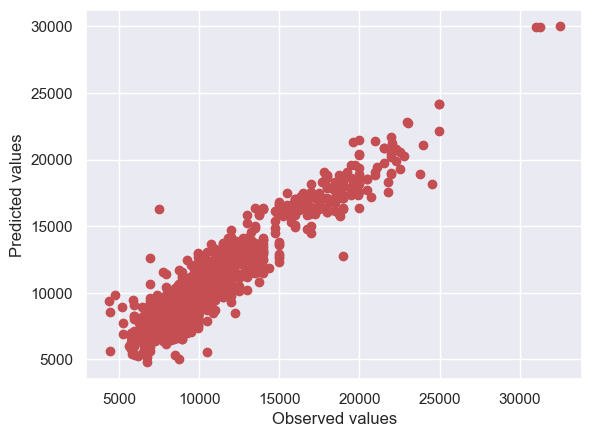

In [64]:
plt.scatter(Toyota4["Price"],Finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")

In [65]:
#residual values vs fitted values

Text(0, 0.5, 'Residuals')

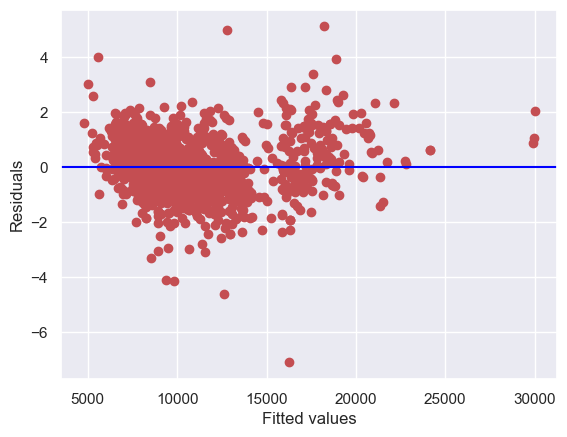

In [66]:
plt.scatter(Finalmodel_pred, Finalmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([  1.,   0.,   3.,  16., 157., 723., 436.,  87.,   6.,   4.]),
 array([-7.11152315, -5.88819747, -4.6648718 , -3.44154612, -2.21822044,
        -0.99489476,  0.22843092,  1.4517566 ,  2.67508227,  3.89840795,
         5.12173363]),
 <BarContainer object of 10 artists>)

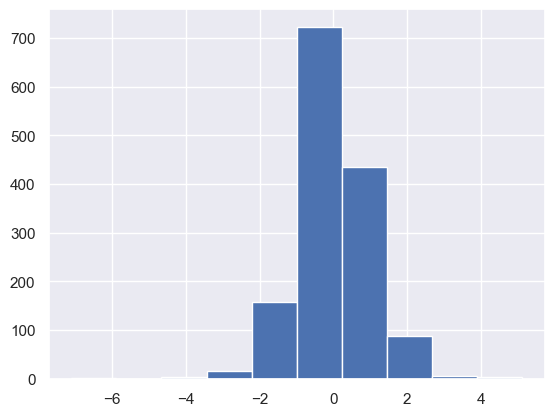

In [67]:
plt.hist(Finalmodel.resid_pearson)

In [69]:
#QQ plot

In [71]:
import pylab
import scipy.stats as st

((array([-3.29990572, -3.0423199 , -2.89905096, ...,  2.89905096,
          3.0423199 ,  3.29990572]),
  array([-7.11152315, -4.61523681, -4.13985897, ...,  4.01261664,
          5.00012015,  5.12173363])),
 (0.9842286314351303, -2.269218421732337e-12, 0.9853340591988048))

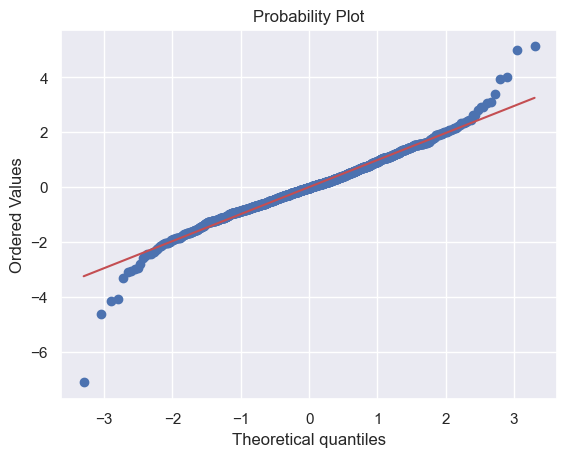

In [72]:
st.probplot(Finalmodel.resid_pearson, dist='norm',plot=pylab)

In [73]:
# Testing of Final Model

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
train_data,test_Data= train_test_split(Toyota1,test_size=0.3)

In [76]:
Finalmodel1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()

In [77]:
Finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     764.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:53:11   Log-Likelihood:                -8678.5
No. Observations:                1005   AIC:                         1.738e+04
Df Residuals:                     996   BIC:                         1.742e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7523.7489   1779.715     -4.228      0.000    -1.1e+04   -4031.328
Age            -119.5871      3.174    -37.680      0.000    -125.815    -113.359
KM               -0.0213      0.001    -14.259      0.000      -0.024      -0.018
HP               32.2566      3.433      9.396      0.000      25.520      38.993
cc               -0.0899      0.093     -0.967      0.334      -0.272       0.092
Doors           -11.6142     48.976     -0.237      0.813    -107.723      84.495
Gears           691.6232    246.969      2.800      0.005     206.983    1176.263
Quarterly_Tax     3.5355      1.652      2.140      0.033       0.293       6.778
Weight           18.1875      1.347     13.501      0.000      15.544      20.831
==============================================================================
Omnibus:                      137.379   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1190.218
Skew:                          -0.293   Prob(JB):                    3.53e-259
Kurtosis:                       8.299   Cond. No.                     3.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
Finalmodel_pred = Finalmodel1.predict(train_data)
Finalmodel_pred

843     10220.595672
1244     8535.123020
1007    10679.414295
1320     9295.473766
559     12399.006154
            ...     
188     12645.549965
1427     8698.506058
477     10667.456134
901      9854.681250
463     12229.453700
Length: 1005, dtype: float64

In [79]:
# Training and Testing of Residual Data

In [80]:
Finalmodel_res = train_data["Price"]-Finalmodel_pred
Finalmodel_res

843     -970.595672
1244   -1585.123020
1007     270.585705
1320     104.526234
559     1100.993846
           ...     
188     -695.549965
1427     251.493942
477     -737.456134
901     -904.681250
463    -3479.453700
Length: 1005, dtype: float64

In [81]:
Finalmodel_rmse = np.sqrt(np.mean(Finalmodel_res*Finalmodel_res))
Finalmodel_rmse

1361.6110071839469

In [82]:
Finalmodel_testpred = Finalmodel1.predict(test_Data)
Finalmodel_testpred

1228     8318.164187
393      8908.170640
1095     6878.482891
625      8564.930269
963     10653.885750
            ...     
255     12974.312715
5       15519.198520
762      8738.820072
453     11019.612788
925      9007.638774
Length: 431, dtype: float64

In [83]:
Finalmodel_testres= test_Data["Price"]-Finalmodel_testpred
Finalmodel_testres

1228    -568.164187
393    -4458.170640
1095      21.517109
625      385.069731
963     -703.885750
           ...     
255      -74.312715
5      -2569.198520
762     1156.179928
453      980.387212
925      -57.638774
Length: 431, dtype: float64

In [84]:
Finalmodel_testrmse = np.sqrt(np.mean(Finalmodel_testres*Finalmodel_testres))
Finalmodel_testrmse

1287.6350305620995

In [86]:
# Done